# **COMP3401 Assignment 2**

### **Exercise 1.1: Principal Component Analysis (PCA) on Cancer Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

### 1. Data Preparation

In [2]:
#Load the cancer dataset
file_path = "/content/drive/MyDrive/COMP 3401/COMP 3401 - A2/cancer_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
#Data encoding
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Scale the data so that all features have a similar range
features_to_scale = df.columns
scaler = StandardScaler()

cancer_data_scaled = scaler.fit_transform(df[features_to_scale])

cancer_data_scaled = pd.DataFrame(cancer_data_scaled, columns=features_to_scale)

cancer_data_scaled.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 2. PCA Applicaon

In [8]:
pca = PCA()

pca.fit(cancer_data_scaled)

PCA()


### 3. Variance Analysis

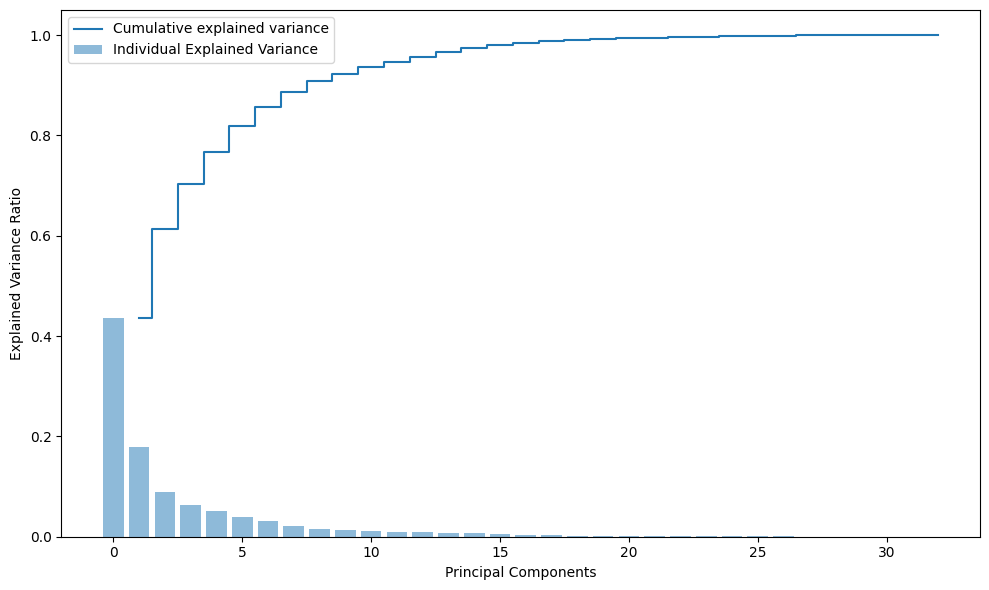

In [9]:
explained_variance = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variances) + 1), cumulative_variances, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 4. Visualization

In [10]:
pca_transformed = pca.transform(cancer_data_scaled)

df_pca = pd.DataFrame(pca_transformed[:, :3], columns=['PC1', 'PC2', 'PC3'])

In [11]:
df_pca['diagnosis'] = df['diagnosis']

In [12]:
df_pca.head()

,PC1,PC2,PC3,diagnosis
0,9.216724,2.136750,-0.996666,1
1,2.651244,-3.770741,-0.554319,1
2,5.900697,-1.010916,-0.467841,1
3,7.137376,10.315636,-3.256828,1
4,4.139263,-1.916891,1.465280,1


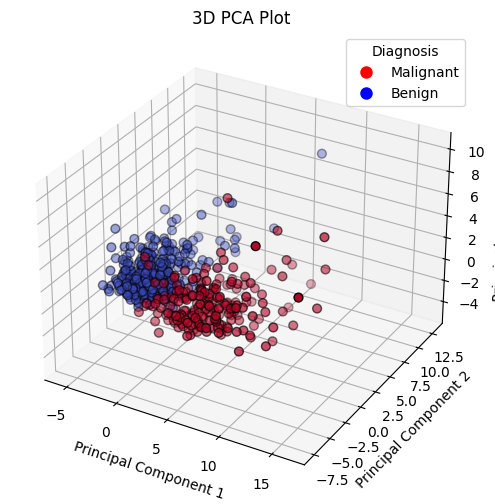

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                     c=df_pca['diagnosis'], cmap='coolwarm',s=40, edgecolor='k')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax.set_title("3D PCA Plot")

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Malignant',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Benign',
                          markerfacecolor='b', markersize=10)]
ax.legend(handles=legend_elements, title="Diagnosis")
plt.show()

### 5. Interpretaon:

Based on the 3D visualization, a predictive model incorporating PCA is likely to perform effectively, as there is a clear distinction observable between the malignant and benign classes.